In [73]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import prince

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

''';

In [88]:
def dim_red(mat, p):
    pca = prince.PCA(
    n_components=p,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )
    pca = pca.fit(mat)    
    red_mat = pca.transform(mat)
    # print eigenvalues
    print(pca.eigenvalues_summary
)
    
    return red_mat


In [75]:
def clust(mat, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(mat)
    return kmeans.labels_


In [76]:
# def clust(mat, k):
#     # kmeans on mat matrix 
    

#     '''
#     Perform clustering

#     Input:
#     -----
#         mat : input list 
#         k : number of cluster
#     Output:
#     ------
#         pred : list of predicted labels
#     '''
    
#     pred = np.random.randint(k, size=len(corpus))
    
#     return pred

In [77]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))
k

20

In [78]:
# load embeddings
embeddings = np.load('embeddings.npy')
# transform to dataframe
embeddings = pd.DataFrame(embeddings)

In [79]:
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.577400,-0.030358,-0.102261,0.060326,-0.015291,-0.234031,-0.346943,0.129524,-0.003832,-0.042432,...,-0.016920,-0.277230,-0.273009,-0.107147,-0.102845,-0.023753,-0.072382,-0.375602,-0.091590,-0.056659
1,-0.547650,-0.147162,-0.109380,-0.169172,0.111827,-0.252576,0.060074,-0.150678,-0.054314,0.073152,...,0.217950,-0.093913,0.157130,0.028333,0.142177,0.352915,-0.091395,-0.188222,-0.072291,-0.150164
2,0.006459,0.161897,-0.224145,0.158056,-0.078980,-0.370586,0.030617,-0.232604,0.238776,-0.035669,...,-0.108683,0.079843,0.105473,-0.153740,-0.381738,-0.089754,0.632199,-0.384035,0.304872,0.175816
3,-0.177904,0.350405,-0.460294,-0.148764,0.055244,0.153033,0.253875,-0.034833,0.219968,0.076479,...,0.183497,0.022842,0.558684,-0.195775,-0.249930,0.223309,0.260235,-0.248233,-0.016308,-0.008697
4,-0.104774,0.072117,-0.288240,-0.295858,-0.028444,0.050851,-0.149128,-0.252626,0.285305,0.427896,...,-0.128132,-0.155114,0.284549,0.264601,-0.247013,0.120582,-0.068725,-0.274165,-0.008575,-0.276295


In [89]:
# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
#pred = clust(red_emb, k)

# evaluate clustering results
# nmi_score = normalized_mutual_info_score(pred,labels)
# ari_score = adjusted_rand_score(pred,labels)

# print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             21.630         5.63%                      5.63%
1             13.700         3.57%                      9.20%
2             10.473         2.73%                     11.93%
3              9.776         2.55%                     14.47%
4              8.209         2.14%                     16.61%
5              7.807         2.03%                     18.64%
6              7.374         1.92%                     20.56%
7              6.977         1.82%                     22.38%
8              6.166         1.61%                     23.99%
9              5.878         1.53%                     25.52%
10             5.706         1.49%                     27.00%
11             5.535         1.44%                     28.45%
12             5.350         1.39%                     29.84%
13             5.044         1.31%                     31.15%
14      

In [90]:
print(red_emb)

component        0         1         2         3         4         5   \
0         -3.758880  2.815035  0.223877 -0.858381  3.194168  4.035556   
1         -3.545845 -1.779428  0.290347 -3.248731 -0.332818 -4.895534   
2          7.666340 -6.480951 -1.860970  0.477012 -2.741860  2.591716   
3          8.513425 -4.055973 -0.689634  0.648788  0.402063 -4.055167   
4          8.160200 -3.514536 -2.295837 -2.038612 -4.507787 -2.977424   
...             ...       ...       ...       ...       ...       ...   
1995      -3.117522  0.260042 -0.064411 -3.507360 -1.616746  0.828371   
1996       4.793908  3.403510  0.536471  4.200731  0.010159 -0.271790   
1997      -2.628488 -1.526865  1.019713  5.247707 -1.593089 -2.640928   
1998      -2.894725 -6.859186 -6.071468  2.457281 -0.875714 -3.227831   
1999      -2.009380 -2.653681  2.654985  0.363351  4.985482 -0.750101   

component        6         7         8         9         10        11  \
0          4.637943  1.642388  0.807777 -1.625977 

c:\Users\utilisateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


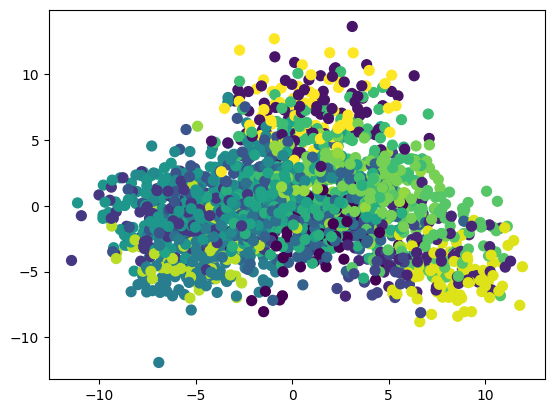

In [94]:
# kmeans on red_emb matrix
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans = kmeans.fit(red_emb)

# predict the labels of clusters.
pred = kmeans.predict(red_emb)

# plot the cluster assignments and cluster centers
plt.scatter(red_emb[0], red_emb[1], c=pred, s=50, cmap='viridis')



In [95]:
#evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')

NMI: 0.42 
ARI: 0.23
